# Machine Learning for CDI: Predicting Electrosorption Capacity
**Project:** Data-driven modeling of Capacitive Deionization (CDI) using Bio-derived Carbon Electrodes.
**Data Source:** Curated dataset from **10 recent peer-reviewed publications** (Real Experimental Data). **Author:** Mianjian, Chemical Engineering

## Objective
To analyze the relationship between textural properties of bio-carbons (Surface Area, Pore Volume, Pore Size) and their desalination performance (Salt Adsorption Capacity) using Machine Learning.

## Methodology
1.  **Data Curation:** Extracted experimental parameters from literature.
2.  **Correlation Analysis:** Using Pearson correlation heatmap to identify key factors.
3.  **ML Modeling:** Implementing a **Random Forest Regressor** to predict adsorption capacity.
4.  **Feature Importance:** Determining which physical property has the highest impact on performance.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# ==========================================
# 1. Plotting Style
# ==========================================
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 12,
    'figure.dpi': 150
})

print(" Libraries Loaded Successfully.")

 Libraries Loaded Successfully.


✅ Dataset Loaded: 12 experimental points found.


,Ref,Surface_Area,Pore_Volume,Pore_Size,Voltage,Capacity
0,1,679,0.383000,2.260000,1.2,14.35
1,2,1416,0.986000,2.000000,1.2,15.65
2,3,2287,1.197655,2.401818,1.2,15.70
3,4,1160,0.652000,2.240000,1.2,24.96
4,5,2453,1.458000,2.380000,1.2,17.04


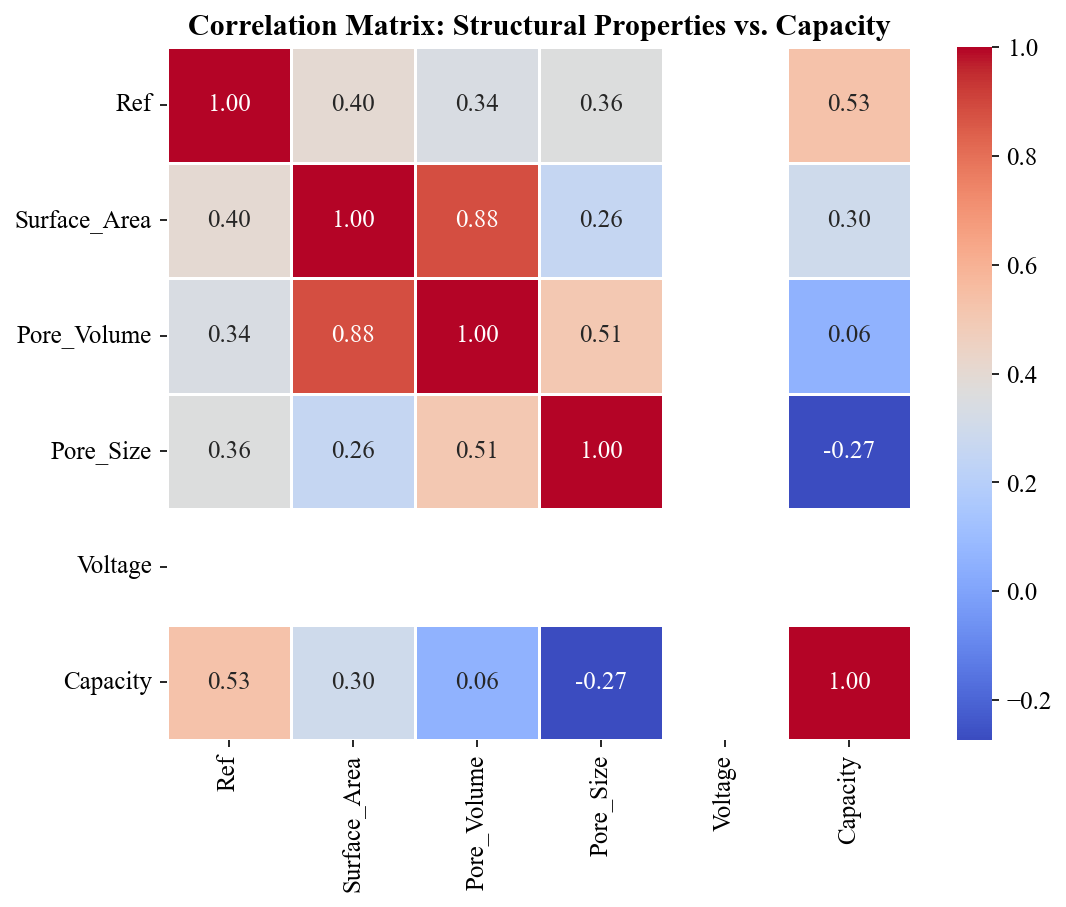

In [21]:
# ==========================================
# 2. Load Experimental Data & Clean
# ==========================================
filename = 'bio_carbon_data.xlsx'

try:
    df = pd.read_csv(filename) if filename.endswith('.csv') else pd.read_excel(filename)
    print(f"✅ Dataset Loaded: {len(df)} experimental points found.")

    df.replace(['-', ' '], np.nan, inplace=True)

    for col in df.columns:
        if col != 'Ref':
            df[col] = pd.to_numeric(df[col], errors='coerce')

    df.fillna(df.mean(numeric_only=True), inplace=True)
    # -----------------------------------------------------

    display(df.head())

except FileNotFoundError:
    print(" Error: File not found. Please upload 'bio_carbon_data.xlsx'.")

# ==========================================
# 3. Correlation Heatmap (EDA)
# ==========================================
plt.figure(figsize=(8, 6))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Structural Properties vs. Capacity', fontweight='bold')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

🔹 Model Performance on Test Data:
   R² Score (Accuracy): -0.9239
   Mean Absolute Error: 6.78 mg/g


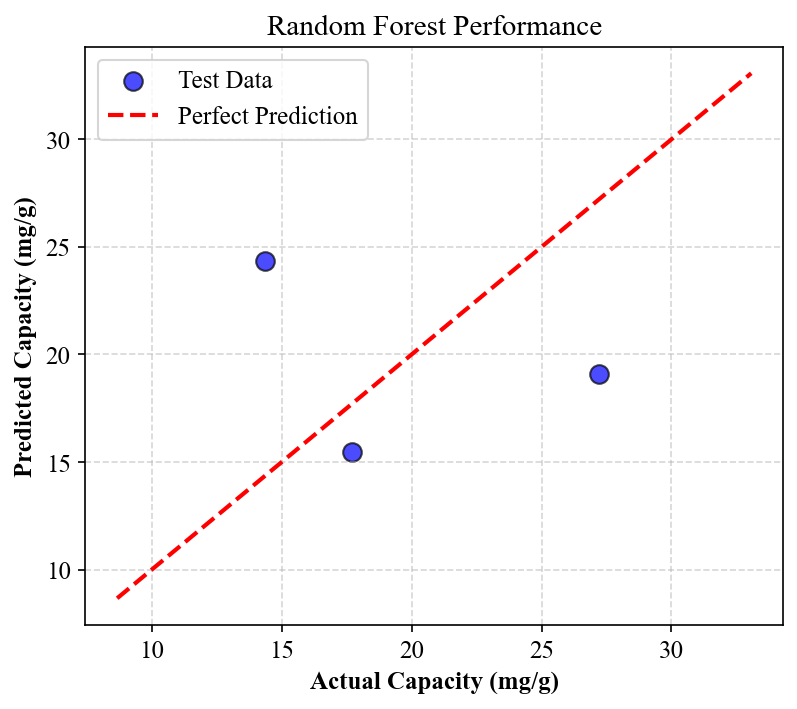

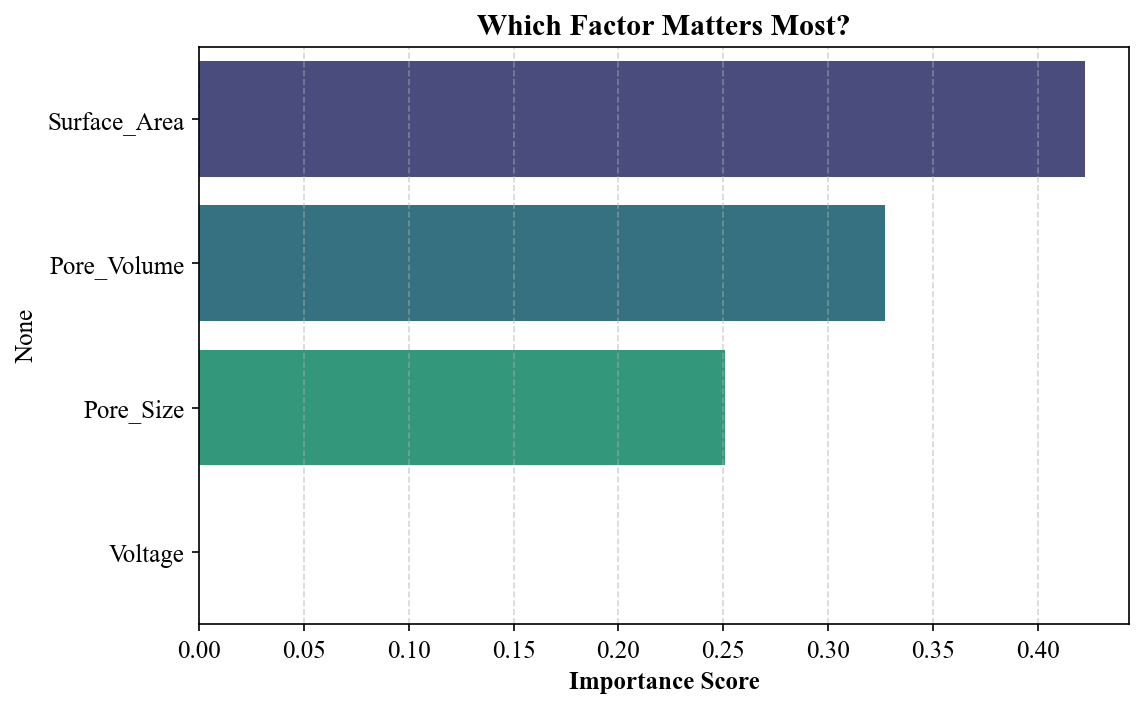

In [22]:
# ==========================================
# 4. Machine Learning Model (Random Forest)
# ==========================================

X = df[['Surface_Area', 'Pore_Volume', 'Pore_Size', 'Voltage']]

y = df['Capacity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 Model Performance on Test Data:")
print(f"   R² Score (Accuracy): {r2:.4f}")
print(f"   Mean Absolute Error: {mae:.2f} mg/g")

# ==========================================
# 5. Visualization: Actual vs. Predicted
# ==========================================
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', s=80, alpha=0.7, label='Test Data')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Capacity (mg/g)', fontweight='bold')
plt.ylabel('Predicted Capacity (mg/g)', fontweight='bold')
plt.title('Random Forest Performance', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ==========================================
# 6. Feature Importance (Insight extraction)
# ==========================================
importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features, hue=features, palette='viridis', legend=False)
plt.xlabel('Importance Score', fontweight='bold')
plt.title('Which Factor Matters Most?', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()